# Machine Learning Lab
## Lab 7 - Decision Tree
---
**Shyam Sundaram<br>
19BCE1560<br>
September 20, 2021<br><br>
Abdul Quadir Md<br>
L31+L32**

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 
import os
from sklearn import metrics

Read the dataset from URL.

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(data_url,names = ['sepal_l','sepal_w','petal_l','petal_w','class'])
print(iris_df.head(10))
# different class labels avaliable

   sepal_l  sepal_w  petal_l  petal_w        class
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa
5      5.4      3.9      1.7      0.4  Iris-setosa
6      4.6      3.4      1.4      0.3  Iris-setosa
7      5.0      3.4      1.5      0.2  Iris-setosa
8      4.4      2.9      1.4      0.2  Iris-setosa
9      4.9      3.1      1.5      0.1  Iris-setosa


In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(data_url,
                   names = ['sepal_l',
                             'sepal_w',
                              'petal_l',
                            'petal_w',
                           'class'])
print(iris_df.head(10))

   sepal_l  sepal_w  petal_l  petal_w        class
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa
5      5.4      3.9      1.7      0.4  Iris-setosa
6      4.6      3.4      1.4      0.3  Iris-setosa
7      5.0      3.4      1.5      0.2  Iris-setosa
8      4.4      2.9      1.4      0.2  Iris-setosa
9      4.9      3.1      1.5      0.1  Iris-setosa


Classes Available

In [4]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Encoding the categorical, non-numeric target to numeric type.

In [5]:
classes = {
    'Iris-setosa': 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
    }
iris_df = iris_df.replace({'class': classes})
iris_df.head(10)

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
X = iris_df.iloc[:,:4]
Y = iris_df.iloc[:,4]
#converting it into an array
X = np.array (X)
Y = np.array (Y)

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
iris_df.shape

(150, 5)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.30, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(105, 4)
(105,)
(45, 4)
(45,)


# Creating the Tree model 
---
## Criteria: Entropy

In [12]:
tree = DecisionTreeClassifier(criterion = 'entropy')

In [13]:
tree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

## Visualizing the tree

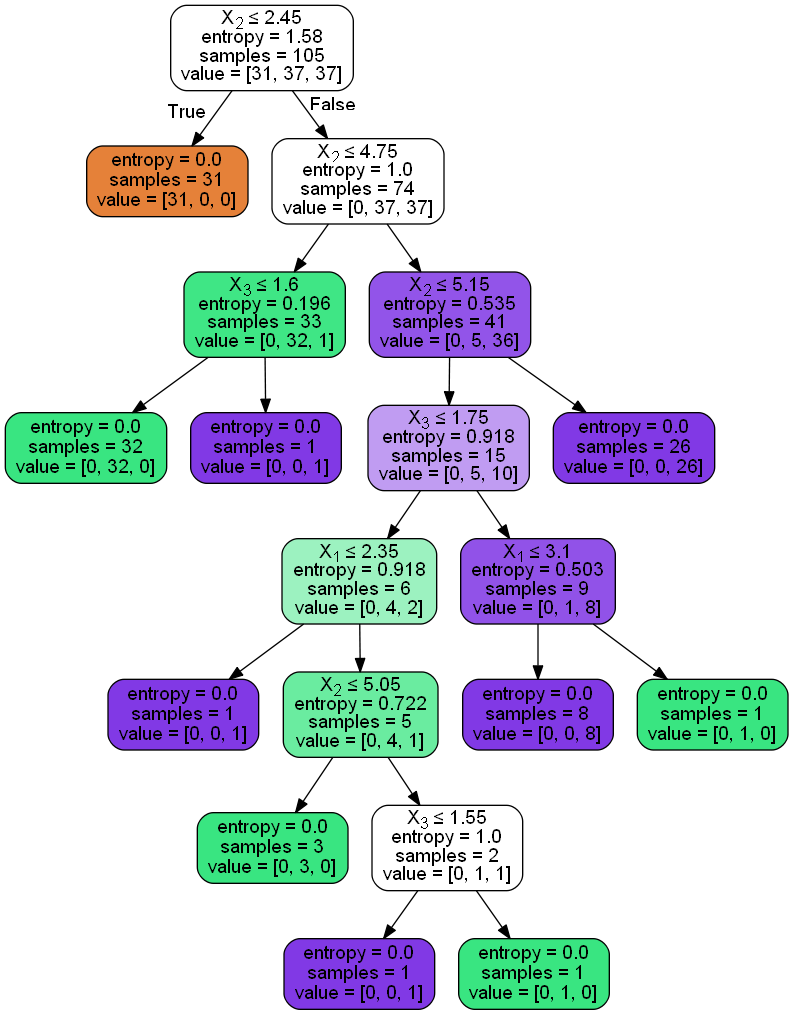

In [14]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300, height=10)

## Evaluating the model

In [15]:
predict = tree.predict(test_x)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [16]:
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 0.9777777777777777


## Limiting the tree growth
We now limit the model to only grow upto 2 levels and observe how it affects the performance.

In [17]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
tree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

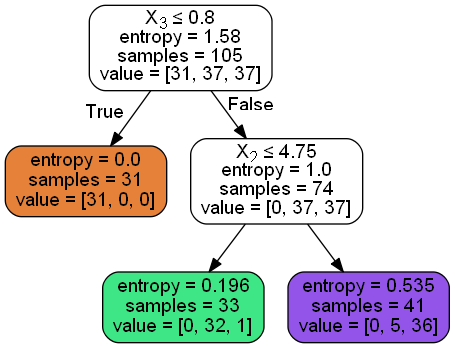

In [18]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300, height=10)

In [19]:
predict = tree.predict(test_x)
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 0.9777777777777777


As expected, the accuracy has taken a hit as we limited the depth of the tree.

## Limiting the splits

Now, we limit the number ominimum sample leaves and minimum split and see if performance is affected.

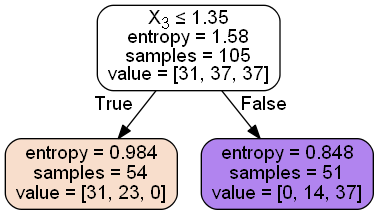

In [20]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 50)
tree.fit(train_x,train_y)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300, height=10)

In [21]:
predict = tree.predict(test_x)
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 0.7111111111111111


Posing a minimum limit on the number of leaves has brought down the accuracy of the model by about 30%.

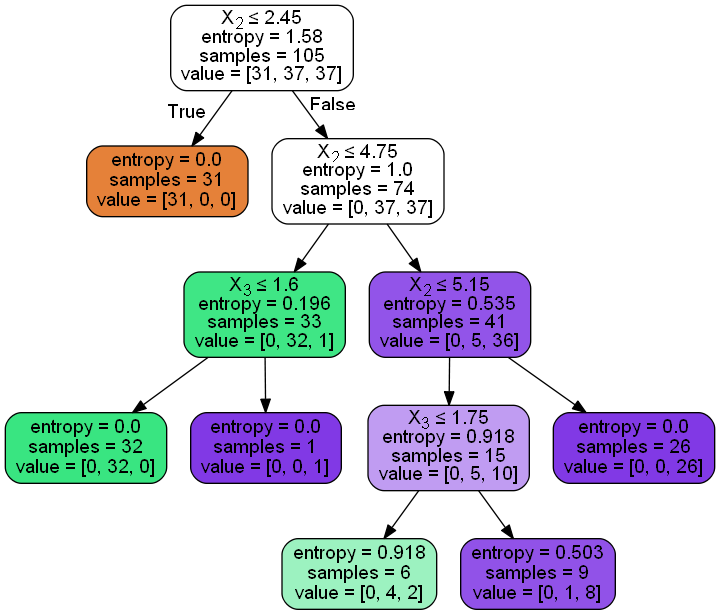

In [22]:
tree = DecisionTreeClassifier(criterion='entropy',min_samples_split = 10)
tree.fit(train_x, train_y)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300, height=10)

In [23]:
predict = tree.predict(test_x)
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 1.0


Imposing a minimum number of splits has affected the accuracy (though not by a lot in this case).

## Criteria: Gini Index

Now, we use the Gini index as the criterion.

In [24]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(train_x, train_y)

DecisionTreeClassifier()

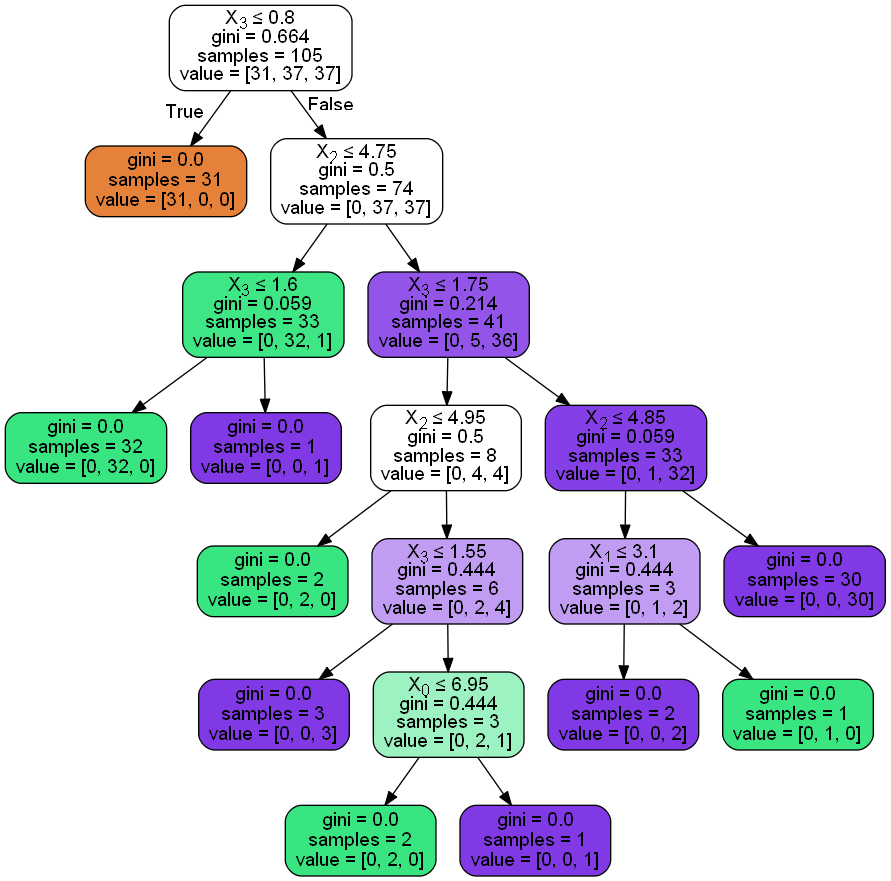

In [25]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300, height=10)

In [26]:
predict = tree.predict(test_x)
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 1.0


# Naive Bayes Classifier
---

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
naiveBay = GaussianNB()

In [29]:
naiveBay.fit(train_x,train_y)

GaussianNB()

In [30]:
predict=naiveBay.predict(test_x)
print('Accuracy:', metrics.accuracy_score(test_y, predict))

Accuracy: 0.9777777777777777
